# Overfitting and Underfitting

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [2]:
NUM_WORDS = 10000

In [3]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [4]:
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

In [5]:
train_data = multi_hot_sequences(train_data, NUM_WORDS)
test_data = multi_hot_sequences(test_data, NUM_WORDS)

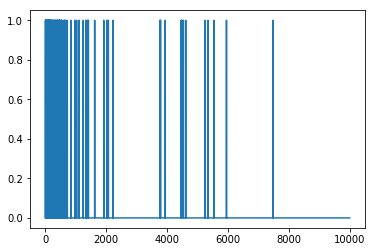

In [6]:
plt.plot(train_data[0])

## Baseline Model

In [7]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [9]:
baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [10]:
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5207 - acc: 0.7942 - binary_crossentropy: 0.5207 - val_loss: 0.3758 - val_acc: 0.8692 - val_binary_crossentropy: 0.3758
Epoch 2/20
 - 4s - loss: 0.2789 - acc: 0.9052 - binary_crossentropy: 0.2789 - val_loss: 0.2917 - val_acc: 0.8874 - val_binary_crossentropy: 0.2917
Epoch 3/20
 - 4s - loss: 0.2032 - acc: 0.9300 - binary_crossentropy: 0.2032 - val_loss: 0.2834 - val_acc: 0.8878 - val_binary_crossentropy: 0.2834
Epoch 4/20
 - 4s - loss: 0.1635 - acc: 0.9445 - binary_crossentropy: 0.1635 - val_loss: 0.2946 - val_acc: 0.8832 - val_binary_crossentropy: 0.2946
Epoch 5/20
 - 4s - loss: 0.1368 - acc: 0.9546 - binary_crossentropy: 0.1368 - val_loss: 0.3160 - val_acc: 0.8784 - val_binary_crossentropy: 0.3160
Epoch 6/20
 - 4s - loss: 0.1165 - acc: 0.9630 - binary_crossentropy: 0.1165 - val_loss: 0.3359 - val_acc: 0.8753 - val_binary_crossentropy: 0.3359
Epoch 7/20
 - 4s - loss: 0.0998 - acc: 0.9690 - binary_crossentropy:

## Smaller Model

In [12]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [14]:
smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

In [15]:
smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [16]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5345 - acc: 0.7876 - binary_crossentropy: 0.5345 - val_loss: 0.4171 - val_acc: 0.8576 - val_binary_crossentropy: 0.4171
Epoch 2/20
 - 4s - loss: 0.3277 - acc: 0.8931 - binary_crossentropy: 0.3277 - val_loss: 0.3244 - val_acc: 0.8783 - val_binary_crossentropy: 0.3244
Epoch 3/20
 - 4s - loss: 0.2479 - acc: 0.9162 - binary_crossentropy: 0.2479 - val_loss: 0.2916 - val_acc: 0.8864 - val_binary_crossentropy: 0.2916
Epoch 4/20
 - 4s - loss: 0.2040 - acc: 0.9316 - binary_crossentropy: 0.2040 - val_loss: 0.2842 - val_acc: 0.8867 - val_binary_crossentropy: 0.2842
Epoch 5/20
 - 4s - loss: 0.1749 - acc: 0.9420 - binary_crossentropy: 0.1749 - val_loss: 0.2876 - val_acc: 0.8844 - val_binary_crossentropy: 0.2876
Epoch 6/20
 - 4s - loss: 0.1528 - acc: 0.9493 - binary_crossentropy: 0.1528 - val_loss: 0.2919 - val_acc: 0.8840 - val_binary_crossentropy: 0.2919
Epoch 7/20
 - 4s - loss: 0.1350 - acc: 0.9577 - binary_crossentropy:

## Bigger Model

In [17]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [18]:
bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

In [19]:
bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [20]:
bigger_history = bigger_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 16s - loss: 0.3457 - acc: 0.8500 - binary_crossentropy: 0.3457 - val_loss: 0.2973 - val_acc: 0.8780 - val_binary_crossentropy: 0.2973
Epoch 2/20
 - 15s - loss: 0.1490 - acc: 0.9442 - binary_crossentropy: 0.1490 - val_loss: 0.3525 - val_acc: 0.8663 - val_binary_crossentropy: 0.3525
Epoch 3/20
 - 16s - loss: 0.0551 - acc: 0.9828 - binary_crossentropy: 0.0551 - val_loss: 0.4216 - val_acc: 0.8670 - val_binary_crossentropy: 0.4216
Epoch 4/20
 - 15s - loss: 0.0110 - acc: 0.9980 - binary_crossentropy: 0.0110 - val_loss: 0.5637 - val_acc: 0.8680 - val_binary_crossentropy: 0.5637
Epoch 5/20
 - 15s - loss: 0.0013 - acc: 1.0000 - binary_crossentropy: 0.0013 - val_loss: 0.6601 - val_acc: 0.8705 - val_binary_crossentropy: 0.6601
Epoch 6/20
 - 16s - loss: 3.1541e-04 - acc: 1.0000 - binary_crossentropy: 3.1541e-04 - val_loss: 0.7011 - val_acc: 0.8702 - val_binary_crossentropy: 0.7011
Epoch 7/20
 - 16s - loss: 1.8370e-04 - acc: 1.0000 - b

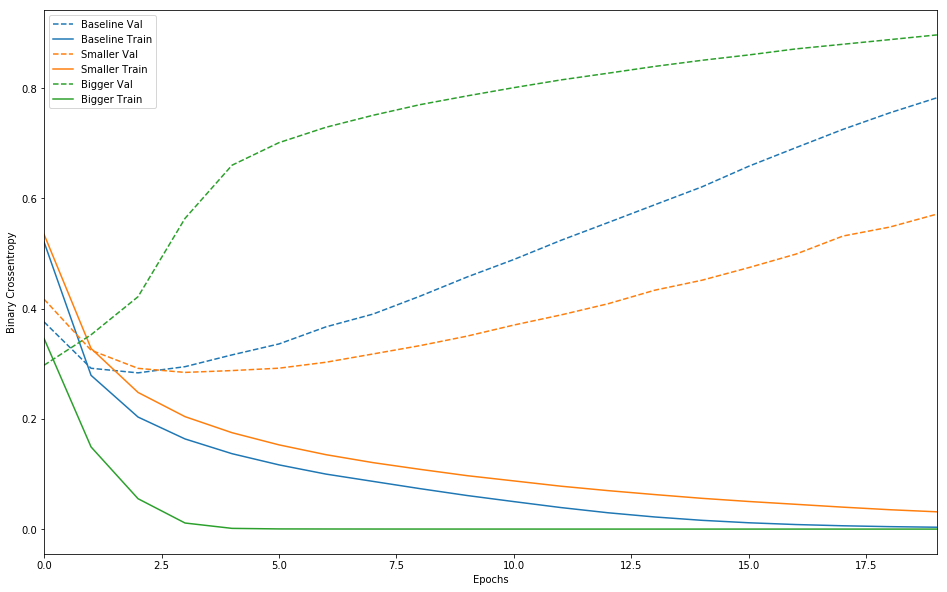

In [22]:
def plot_histroy(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+ ' Train')
        
        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_', ' ').title())
        plt.legend()
        
        plt.xlim([0, max(history.epoch)])

plot_histroy([('baseline', baseline_history),
            ('smaller', smaller_history),
            ('bigger', bigger_history)])

## Preventing overfitting - Regularization

In [26]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [27]:
l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

In [28]:
l2_model_history = l2_model.fit(train_data,
                               train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.5463 - acc: 0.8041 - binary_crossentropy: 0.5065 - val_loss: 0.4006 - val_acc: 0.8722 - val_binary_crossentropy: 0.3588
Epoch 2/20
 - 8s - loss: 0.3221 - acc: 0.9031 - binary_crossentropy: 0.2752 - val_loss: 0.3399 - val_acc: 0.8862 - val_binary_crossentropy: 0.2895
Epoch 3/20
 - 8s - loss: 0.2684 - acc: 0.9233 - binary_crossentropy: 0.2157 - val_loss: 0.3368 - val_acc: 0.8867 - val_binary_crossentropy: 0.2826
Epoch 4/20
 - 8s - loss: 0.2431 - acc: 0.9346 - binary_crossentropy: 0.1876 - val_loss: 0.3432 - val_acc: 0.8848 - val_binary_crossentropy: 0.2872
Epoch 5/20
 - 8s - loss: 0.2291 - acc: 0.9403 - binary_crossentropy: 0.1717 - val_loss: 0.3540 - val_acc: 0.8804 - val_binary_crossentropy: 0.2960
Epoch 6/20
 - 8s - loss: 0.2162 - acc: 0.9462 - binary_crossentropy: 0.1578 - val_loss: 0.3637 - val_acc: 0.8788 - val_binary_crossentropy: 0.3052
Epoch 7/20
 - 8s - loss: 0.2091 - acc: 0.9492 - binary_crossentropy

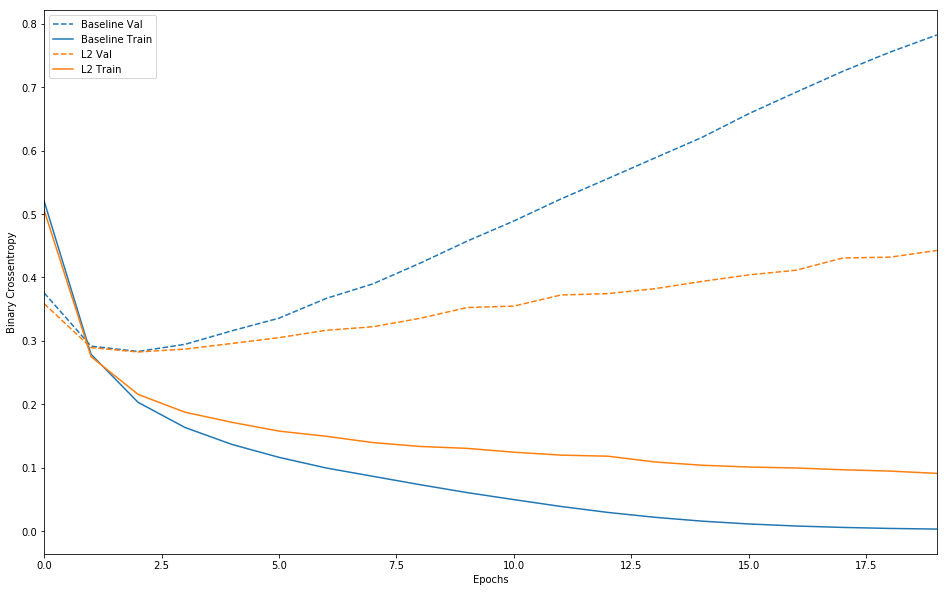

In [29]:
plot_histroy([('baseline', baseline_history),
             ('l2', l2_model_history)])

## Dropout Regularization

In [30]:
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [31]:
dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [32]:
dpt_model_history = dpt_model.fit(train_data,
                                 train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.6226 - acc: 0.6532 - binary_crossentropy: 0.6226 - val_loss: 0.4779 - val_acc: 0.8516 - val_binary_crossentropy: 0.4779
Epoch 2/20
 - 8s - loss: 0.4546 - acc: 0.8103 - binary_crossentropy: 0.4546 - val_loss: 0.3452 - val_acc: 0.8807 - val_binary_crossentropy: 0.3452
Epoch 3/20
 - 8s - loss: 0.3541 - acc: 0.8670 - binary_crossentropy: 0.3541 - val_loss: 0.2971 - val_acc: 0.8876 - val_binary_crossentropy: 0.2971
Epoch 4/20
 - 8s - loss: 0.2919 - acc: 0.8978 - binary_crossentropy: 0.2919 - val_loss: 0.2751 - val_acc: 0.8888 - val_binary_crossentropy: 0.2751
Epoch 5/20
 - 8s - loss: 0.2525 - acc: 0.9122 - binary_crossentropy: 0.2525 - val_loss: 0.2748 - val_acc: 0.8888 - val_binary_crossentropy: 0.2748
Epoch 6/20
 - 8s - loss: 0.2189 - acc: 0.9237 - binary_crossentropy: 0.2189 - val_loss: 0.2884 - val_acc: 0.8848 - val_binary_crossentropy: 0.2884
Epoch 7/20
 - 8s - loss: 0.1962 - acc: 0.9317 - binary_crossentropy

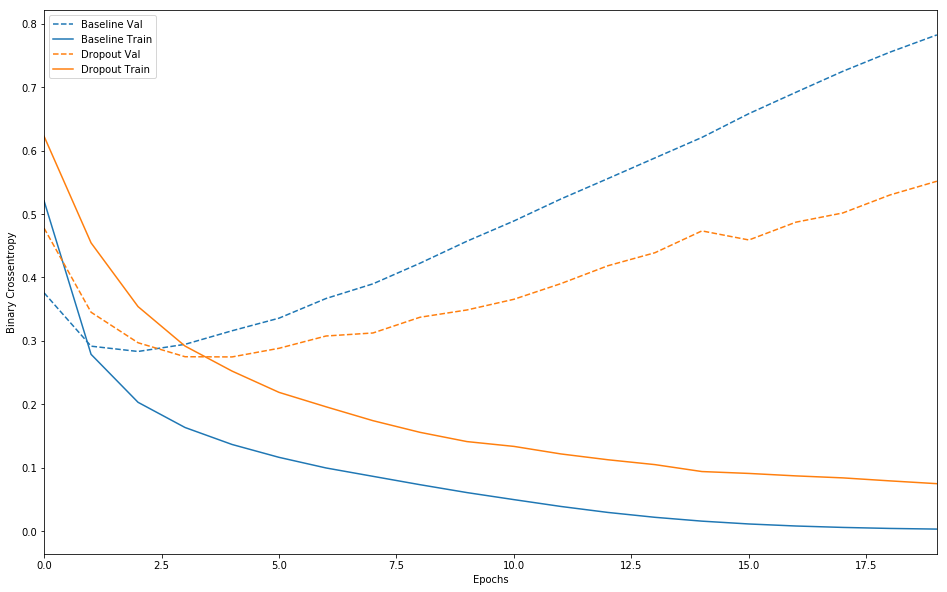

In [34]:
plot_histroy([('baseline', baseline_history),
             ('dropout', dpt_model_history)])